In [1]:
from pyautoml import Clean, Preprocess, Feature, Model
import pandas as pd
%matplotlib inline

train_data = pd.read_csv('data/train.csv')

Loading BokehJS ...

In [2]:
clean = Clean(data=train_data, target_field='Survived', report_name='Titanic')

In [3]:
# clean.data_report(title='Titanic Summary', output_file='titanic_summary.html')

## Cleaning

In [4]:
clean.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,712,712,712,NaN,NaN,566,712,712,NaN,712,NaN,NaN
mean,442.431,0.383427,2.3132,NaN,NaN,29.784,0.543539,0.379213,NaN,31.8899,NaN,NaN
std,259.55,0.486563,0.829447,NaN,NaN,14.7422,1.13916,0.802258,NaN,50.0144,NaN,NaN
min,1,0,1,NaN,NaN,0.67,0,0,NaN,0,NaN,NaN
25%,216.5,0,2,NaN,NaN,20.625,0,0,NaN,7.925,NaN,NaN
50%,439,0,3,NaN,NaN,28.5,0,0,NaN,14.4583,NaN,NaN
75%,668.25,1,3,NaN,NaN,39,1,0,NaN,31.0688,NaN,NaN
max,891,1,3,NaN,NaN,80,8,6,NaN,512.329,NaN,NaN
counts,712,712,712,712,712,566,712,712,712,712,160,711
uniques,712,2,3,712,2,83,7,7,568,234,127,3


In [5]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,712,712,712,712,712,566,712,712,712,712,160,711
uniques,712,2,3,712,2,83,7,7,568,234,127,3
missing,0,0,0,0,0,146,0,0,0,0,552,1
missing_perc,0%,0%,0%,0%,0%,20.51%,0%,0%,0%,0%,77.53%,0.14%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


mean                        31.8899
std                         50.0144
variance                    2501.44
min                               0
max                         512.329
mode                             13
5%                            7.225
25%                           7.925
50%                         14.4583
75%                         31.0688
95%                          111.96
iqr                         23.1438
kurtosis                    38.7774
skewness                    5.19813
sum                         22705.6
mad                         27.5986
cv                          1.56834
zeros_num                        10
zeros_perc                    1.40%
deviating_of_mean                13
deviating_of_mean_perc        1.83%
deviating_of_median              42
deviating_of_median_perc      5.90%
top_correlations                   
counts                          712
uniques                         234
missing                           0
missing_perc                

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


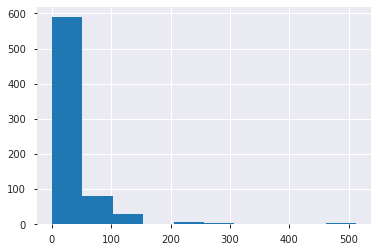

In [6]:
clean.describe_column('Fare')

31.889933988764046

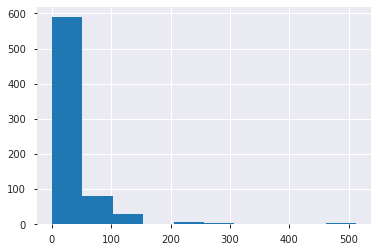

In [7]:
clean.describe_column('Fare')['mean']

In [8]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,552.000000,146.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.775281,0.205056,0.001404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,135.00000,31.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.75419,0.173184,0.005587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
iter1 = clean.replace_missing_mostcommon('Fare', 'Embarked')

In [10]:
iter1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,A23,30,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,F G73,7.65,S
2,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,NaN,7.2292,C
3,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,NaN,7.75,Q
4,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,NaN,9.8375,S


In [11]:
iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,552.000000,146.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.775281,0.205056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,135.00000,31.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.75419,0.173184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


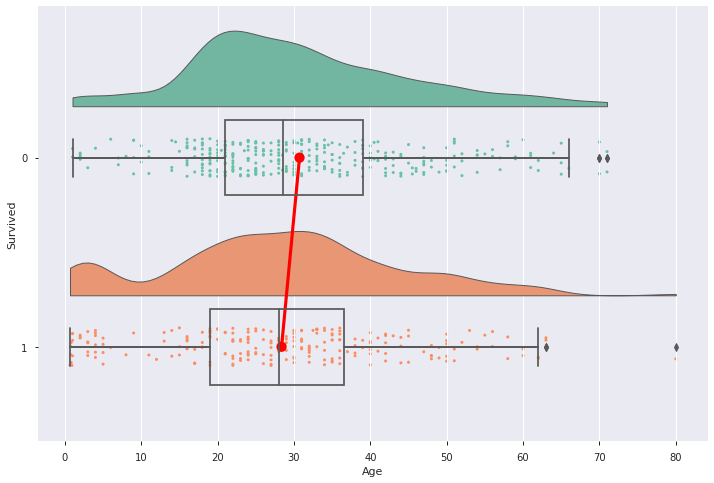

In [12]:
clean.visualize_raincloud('Age')

In [13]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,552.000000,146.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.775281,0.205056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,135.00000,31.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.75419,0.173184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
clean.replace_missing_random_discrete('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,A23,30,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,F G73,7.65,S
2,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,NaN,7.2292,C
3,594,0,3,"Bourke, Miss. Mary",female,39.0,0,2,364848,NaN,7.75,Q
4,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,NaN,9.8375,S


In [15]:
clean.missing_values

,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,552.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.775281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,135.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.75419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
## Proving iter1 is a completely separate instance

iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,552.000000,146.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.775281,0.205056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,135.00000,31.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.75419,0.173184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
clean.visualize_barplot('Age', 'Survived', groupby='Age', method='mean', xlabel='Age')

In [18]:
clean.drop('Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,S
2,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,C
3,594,0,3,"Bourke, Miss. Mary",female,39.0,0,2,364848,7.75,Q
4,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,S


In [19]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
counts,712,712,712,712,712,712,712,712,712,712,712
uniques,712,2,3,712,2,83,7,7,568,234,3
missing,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,categorical,categorical


In [20]:
clean.visualize_scatterplot('Age', 'Fare', fill_color='yellow')

## Feature Engineering

In [21]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Nobel",
                    "Don":        "Nobel",
                    "Sir" :       "Nobel",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Nobel",
                    "Dona":       "Nobel",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Nobel"
                    } 

feature = Feature(clean)

In [22]:
feature.apply(lambda x: Title_Dictionary[x['Name'].split(',')[1].split('.')[0].strip()], 'Title')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mr
2,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,C,Mr
3,594,0,3,"Bourke, Miss. Mary",female,39.0,0,2,364848,7.7500,Q,Miss
4,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,S,Miss


In [23]:
feature['FamilySize'] = ( feature['SibSp'] + feature['Parch'],
                         feature.test_data['SibSp'] + feature.test_data['SibSp'] )

In [24]:
feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S,Mr,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mr,0
2,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,C,Mr,0
3,594,0,3,"Bourke, Miss. Mary",female,39.0,0,2,364848,7.7500,Q,Miss,2
4,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,S,Miss,0


In [25]:
## Can still do apply and it will apply to both train and test dataset.

def get_person(passenger):
    age = passenger['Age']
    sex = passenger['Sex']
    return 'child' if age < 16 else sex

feature.apply(get_person, 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S,Mr,0,male
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mr,0,male
2,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,C,Mr,0,male
3,594,0,3,"Bourke, Miss. Mary",female,39.0,0,2,364848,7.7500,Q,Miss,2,female
4,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,S,Miss,0,female


In [26]:
## Can still do lambda.

feature.apply(lambda x: 'child' if x['Age'] < 16 else x['Sex'], 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S,Mr,0,male
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mr,0,male
2,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,C,Mr,0,male
3,594,0,3,"Bourke, Miss. Mary",female,39.0,0,2,364848,7.7500,Q,Miss,2,female
4,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,S,Miss,0,female


In [27]:
feature.drop('Name', 'Ticket', 'SibSp', 'Parch', 'Sex', 'PassengerId')

,Survived,Pclass,Age,Fare,Embarked,Title,FamilySize,Person
0,1,1,80.0,30.0000,S,Mr,0,male
1,0,3,25.0,7.6500,S,Mr,0,male
2,0,3,23.5,7.2292,C,Mr,0,male
3,0,3,39.0,7.7500,Q,Miss,2,female
4,0,3,22.0,9.8375,S,Miss,0,female


In [28]:
feature.onehot_encode('Person', 'Embarked', 'Title', 'Pclass', keep_col=False)

,Survived,Age,Fare,FamilySize,Person_child,Person_female,Person_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobel,Title_Officer,Pclass_1,Pclass_2,Pclass_3
0,1,80.0,30.0000,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,25.0,7.6500,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,23.5,7.2292,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,39.0,7.7500,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,22.0,9.8375,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Modelling

In [29]:
model = Model(feature)

In [30]:
model.logistic_regression()

/home/sidha62/.virtualenvs/pyautoml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sidha62/.virtualenvs/pyautoml/lib/python3.6/site-packages/shap/explainers/linear.py:49: UserWarning: The default value for feature_dependence has been changed to "independent"!
  warnings.warn('The default value for feature_dependence has been changed to "independent"!')


In [31]:
model.list_models()

######## QUEUED MODELS ########
No queued models.

######### RAN MODELS ##########
log_reg


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


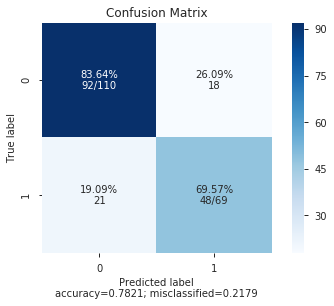

In [32]:
model.log_reg.confusion_matrix(hide_counts=False)

In [33]:
model.log_reg.roc_curve()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


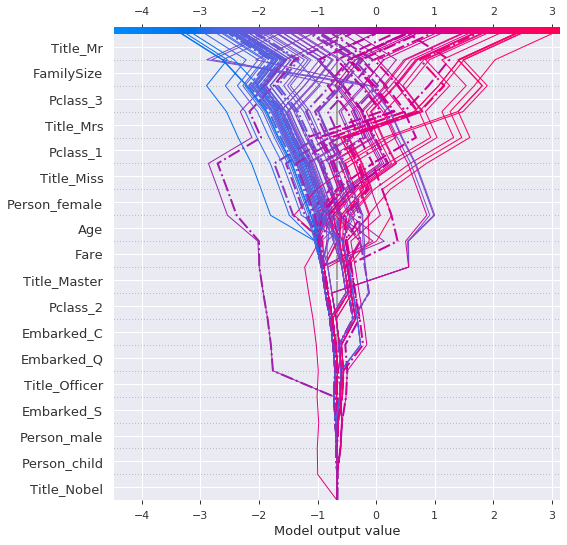

In [34]:
r = model.log_reg.decision_plot(0.5, highlight_misclassified=True)

In [35]:
model.log_reg.force_plot(sample_no=1)

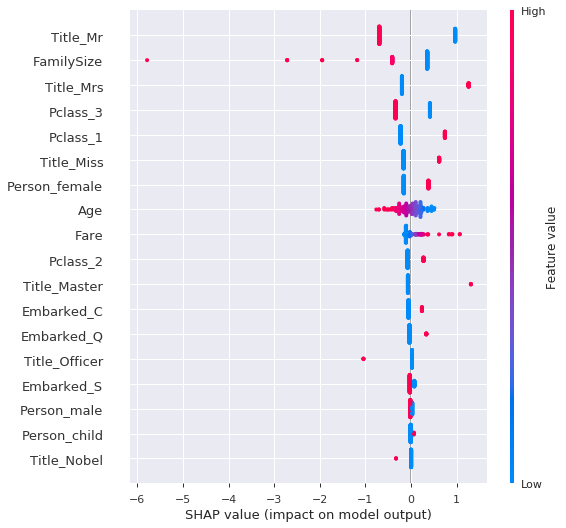

In [36]:
model.log_reg.summary_plot()

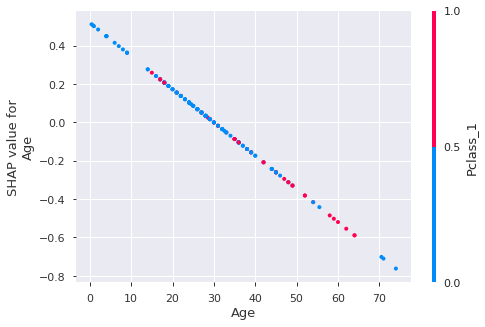

In [37]:
model.log_reg.dependence_plot('Age')